In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cancer_classification.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.shape



(569, 31)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


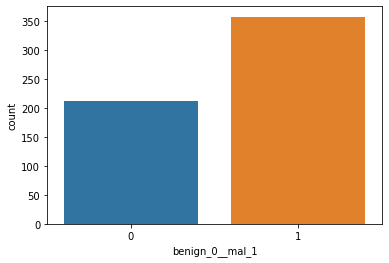

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

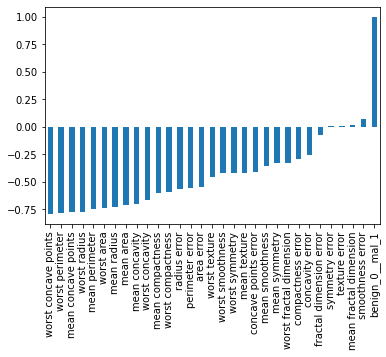

In [10]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

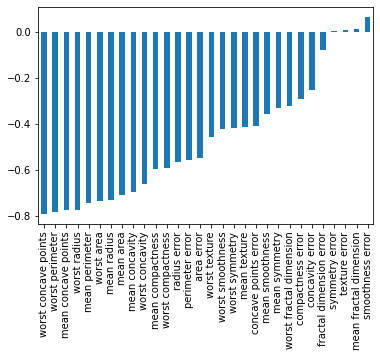

In [11]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

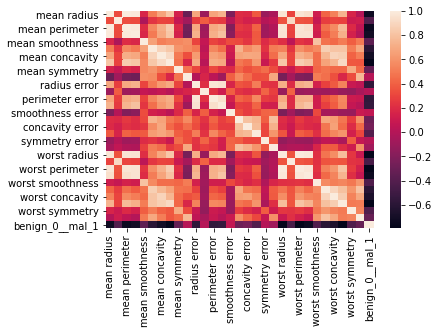

In [12]:
sns.heatmap(df.corr())

In [13]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense

In [23]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 16ms/step - loss: 0.7039 - val_loss: 0.6581
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6448 - val_loss: 0.6146
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6000 - val_loss: 0.5730
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5498 - val_loss: 0.5241
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5055 - val_loss: 0.4700
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4560 - val_loss: 0.4147
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4011 - val_loss: 0.3627
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3724 - val_loss: 0.3190
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3146 - val_loss: 0.2820
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2847 - val_loss: 0.2544
Epoch 11

In [28]:
losses = pd.DataFrame(model.history.history)

In [29]:
losses

,loss,val_loss
0,0.690756,0.658072
1,0.636511,0.614580
2,0.592166,0.572990
3,0.546943,0.524130
4,0.496280,0.469983
...,...,...
595,0.008126,0.203623
596,0.009685,0.174438
597,0.008516,0.190930
598,0.009547,0.190036


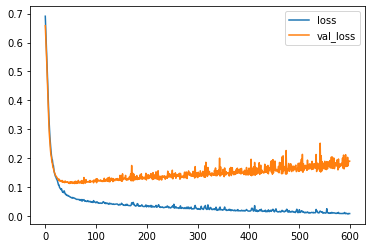

In [30]:
losses.plot()

In [31]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [33]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Arguments:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantit

In [34]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [35]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.6749 - val_loss: 0.6496
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6424 - val_loss: 0.6134
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5993 - val_loss: 0.5618
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5503 - val_loss: 0.5046
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5053 - val_loss: 0.4525
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4398 - val_loss: 0.4015
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4078 - val_loss: 0.3575
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3521 - val_loss: 0.3165
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3192 - val_loss: 0.2857
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2713 - val_loss: 0.2586
Epoch 11

In [36]:
model_loss = pd.DataFrame(model.history.history)

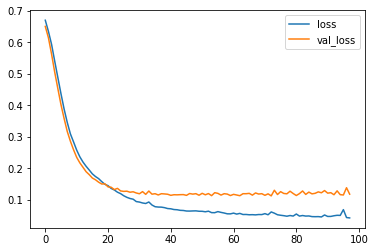

In [37]:
model_loss.plot()

In [38]:
from tensorflow.keras.layers import Dropout

In [39]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#Binary Classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [40]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.7596 - val_loss: 0.6657
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6616 - val_loss: 0.6512
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6823 - val_loss: 0.6351
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6849 - val_loss: 0.6193
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6352 - val_loss: 0.5985
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6227 - val_loss: 0.5691
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6046 - val_loss: 0.5407
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5714 - val_loss: 0.5084
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5556 - val_loss: 0.4753
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5476 - val_loss: 0.4458
Epoch 11

In [41]:
model_loss = pd.DataFrame(model.history.history)

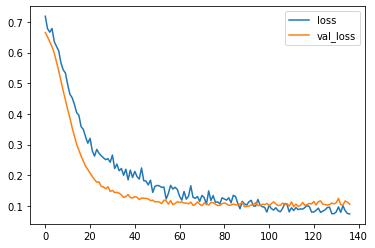

In [42]:
model_loss.plot()

In [44]:
model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [45]:
predictions = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [48]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
